In [1]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier

from data_utils import *
from models_utils import *
from pkl_utils import *

In [2]:
df = get_raw_data('../data/allNamesClean.csv')

In [3]:
df_translit_ru = filter_data(df)

# No aggregation

Training best model and testing it

In [4]:
le, X_train, X_test, y_train, y_test = split_data(df_translit_ru)

In [5]:
clf = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])

In [6]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

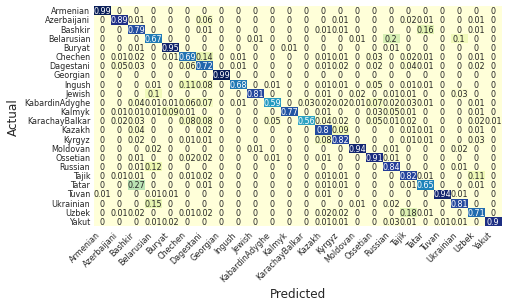

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9991	0.9889	0.9931	0.9910
Azerbaijani    	0.9901	0.8792	0.8889	0.8840
Bashkir        	0.9597	0.7234	0.7868	0.7537
Belarusian     	0.9516	0.7229	0.6694	0.6951
Buryat         	0.9953	0.9345	0.9513	0.9428
Chechen        	0.9835	0.7472	0.6917	0.7184
Dagestani      	0.9726	0.6873	0.7218	0.7041
Georgian       	0.9987	0.9860	0.9911	0.9885
Ingush         	0.9967	0.8609	0.6781	0.7586
Jewish         	0.9933	0.9143	0.8101	0.8590
KabardinAdyghe 	0.9958	0.7850	0.5915	0.6747
Kalmyk         	0.9971	0.9286	0.7706	0.8423
KarachayBalkar 	0.9959	0.8490	0.5582	0.6736
Kazakh         	0.9770	0.8257	0.8005	0.8129
Kyrgyz         	0.9786	0.8219	0.8168	0.8193
Moldovan       	0.9941	0.9436	0.9388	0.9412
Ossetian       	0.9927	0.8416	0.9071	0.8731
Russian        	0.9684	0.7320	0.8392	0.7820
Tajik          	0.9740	0.7737	0.8217	0.7970
Tatar          	0.9649	0.6817	0.6507	0.6658
Tuvan          	0.9985	0.9750	0.9448	0.9597
Ukrainian      	0.9779	0.7814	0.8076	0.7943


{'accuracy': 0.8133614737226087,
 'precision macro': 0.8379730217108928,
 'recall macro': 0.8014453042652933,
 'f1 macro': 0.8164645229667542}

In [7]:
test_model(clf, le, X_test, y_test, 'cm_full.tif')

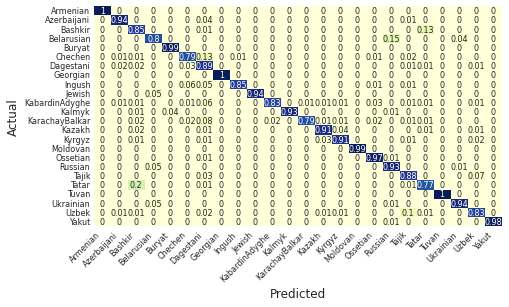

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9998	0.9965	0.9995	0.9980
Azerbaijani    	0.9943	0.9439	0.9353	0.9396
Bashkir        	0.9720	0.8035	0.8490	0.8256
Belarusian     	0.9772	0.8920	0.7985	0.8427
Buryat         	0.9988	0.9838	0.9910	0.9874
Chechen        	0.9902	0.8759	0.7927	0.8322
Dagestani      	0.9808	0.8011	0.8936	0.8448
Georgian       	0.9999	0.9990	0.9999	0.9994
Ingush         	0.9984	0.9424	0.8475	0.8924
Jewish         	0.9984	0.9854	0.9429	0.9637
KabardinAdyghe 	0.9984	0.9473	0.8274	0.8833
Kalmyk         	0.9991	0.9791	0.9322	0.9551
KarachayBalkar 	0.9983	0.9661	0.7912	0.8699
Kazakh         	0.9921	0.9434	0.9097	0.9262
Kyrgyz         	0.9912	0.9254	0.9120	0.9187
Moldovan       	0.9992	0.9936	0.9895	0.9916
Ossetian       	0.9978	0.9549	0.9671	0.9610
Russian        	0.9819	0.8290	0.9309	0.8770
Tajik          	0.9845	0.8715	0.8776	0.8745
Tatar          	0.9743	0.7878	0.7652	0.7763
Tuvan          	0.9999	0.9986	0.9979	0.9982
Ukrainian      	0.9931	0.9178	0.9384	0.9280


{'accuracy': 0.9021963988319729,
 'precision macro': 0.9247457830421361,
 'recall macro': 0.9041416283250069,
 'f1 macro': 0.9132733114874965}

In [8]:
test_model(clf, le, X_train, y_train)

In [9]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

In [10]:
def print_person(X, y_corr, y_pred, probs, le):
    top_inds = probs.argsort()[-3:][::-1]
    ln, fn = X.split('#')
    print(
        'Name: {} {}; true: {}; pred: {}; top 3: {} {:1.4f}, {} {:1.4f}, {} {:1.4f}'.format(
            fn, ln, le.inverse_transform([y_corr])[0], le.inverse_transform([y_pred])[0],
            le.inverse_transform([top_inds[0]])[0], probs[top_inds[0]],
            le.inverse_transform([top_inds[1]])[0], probs[top_inds[1]],
            le.inverse_transform([top_inds[2]])[0], probs[top_inds[2]],
        )
    )
    
    
def show_insecure_correct_preds(X_test, y_test, y_pred, y_prob, le, insecurity=0.5):
    inds = y_pred == y_test
    X_correct = X_test[inds]
    y_correct = y_test[inds]
    y_prob_correct = y_prob[inds]
    cnt = 0
    
    for i in range(len(y_correct)):
        if np.max(y_prob_correct[i]) <= insecurity:
            print_person(X_correct[i], y_correct[i], y_correct[i], y_prob_correct[i], le)
            cnt += 1
    print()        
    print('Number of matches:', cnt)

def show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, security=0.6):
    inds = y_pred != y_test
    X_incorrect = X_test[inds]
    y_true = y_test[inds]
    y_incorrect = y_pred[inds]
    y_prob_incorrect = y_prob[inds]
    cnt = 0
    
    for i in range(len(y_prob_incorrect)):
        if np.max(y_prob_incorrect[i]) >= security:
            print_person(X_incorrect[i], y_true[i], y_incorrect[i], y_prob_incorrect[i], le)
            cnt += 1
    print()        
    print('Number of matches:', cnt)

Looking at model confidence

In [11]:
show_insecure_correct_preds(X_test, y_test, y_pred, y_prob, le, 0.35)

Name: зинаида баглаева; true: Buryat; pred: Buryat; top 3: Buryat 0.3153, Russian 0.2718, Ossetian 0.1560
Name: аделия ибрагимова; true: Bashkir; pred: Bashkir; top 3: Bashkir 0.2922, Dagestani 0.2862, Tatar 0.2849
Name: саша сапаев; true: Russian; pred: Russian; top 3: Russian 0.3438, Chechen 0.2552, Belarusian 0.1995
Name: диана касим; true: Kazakh; pred: Kazakh; top 3: Kazakh 0.2934, Belarusian 0.2262, Moldovan 0.2131
Name: усман тахиров; true: Tajik; pred: Tajik; top 3: Tajik 0.2306, Chechen 0.2303, Azerbaijani 0.2283
Name: азаке ыусупов; true: Kyrgyz; pred: Kyrgyz; top 3: Kyrgyz 0.3380, Tajik 0.3132, Uzbek 0.3039
Name: азамат бакаев; true: Kyrgyz; pred: Kyrgyz; top 3: Kyrgyz 0.3287, Ossetian 0.2921, Bashkir 0.1671
Name: алимхан алиханов; true: Kazakh; pred: Kazakh; top 3: Kazakh 0.3271, Dagestani 0.3047, Chechen 0.2136
Name: агнеса влас; true: Moldovan; pred: Moldovan; top 3: Moldovan 0.2667, Kazakh 0.2590, Jewish 0.1965
Name: сабрина сайдахметова; true: Tajik; pred: Tajik; top 3:

In [12]:
show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, 0.6)

Name: таня бодрова; true: Belarusian; pred: Russian; top 3: Russian 0.6665, Belarusian 0.2203, Ukrainian 0.1132
Name: анастасия гайванович; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.9979, Tatar 0.0021, Yakut 0.0000
Name: шахбоз эралиев; true: Uzbek; pred: Tajik; top 3: Tajik 0.6967, Uzbek 0.2028, Kyrgyz 0.1005
Name: андрей миров; true: Belarusian; pred: Russian; top 3: Russian 0.6318, Belarusian 0.3347, Ossetian 0.0335
Name: шейх хизриев; true: Chechen; pred: Dagestani; top 3: Dagestani 0.8166, Jewish 0.1094, Chechen 0.0740
Name: кирилл лысков; true: Belarusian; pred: Russian; top 3: Russian 0.8282, Belarusian 0.1718, Yakut 0.0000
Name: али абдуракхманов; true: Dagestani; pred: Uzbek; top 3: Uzbek 0.6116, Dagestani 0.1726, Kyrgyz 0.1524
Name: супьян лабазанов; true: Chechen; pred: Dagestani; top 3: Dagestani 0.6268, Chechen 0.3421, Russian 0.0310
Name: абийир касенов; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 0.7628, Dagestani 0.1501, Kyrgyz 0.0871
Name: бекхруз мустафоев;

Name: карен борецкий; true: Jewish; pred: Belarusian; top 3: Belarusian 0.8706, Jewish 0.0753, Armenian 0.0541
Name: александра серебрякова; true: Belarusian; pred: Russian; top 3: Russian 0.7394, Belarusian 0.2606, Yakut 0.0000
Name: нурислам зиннатуллин; true: Bashkir; pred: Tatar; top 3: Tatar 0.6768, Bashkir 0.3189, Kazakh 0.0043
Name: олег соколов; true: Belarusian; pred: Russian; top 3: Russian 0.8489, Ukrainian 0.0850, Belarusian 0.0472
Name: сухроб алиев; true: Uzbek; pred: Tajik; top 3: Tajik 0.8186, Uzbek 0.1814, Yakut 0.0000
Name: аделия мингазова; true: Bashkir; pred: Tatar; top 3: Tatar 0.8360, Bashkir 0.1640, Yakut 0.0000
Name: люция булатова; true: Tatar; pred: Bashkir; top 3: Bashkir 0.7957, Tatar 0.1736, Chechen 0.0251
Name: андрей киранов; true: Belarusian; pred: Russian; top 3: Russian 0.6507, Belarusian 0.2120, Ossetian 0.1347
Name: александр цыганюк; true: Russian; pred: Belarusian; top 3: Belarusian 0.7083, Ukrainian 0.2896, Buryat 0.0022
Name: екатерина ковтун; t

Name: умид идрисов; true: Azerbaijani; pred: Uzbek; top 3: Uzbek 0.8314, Bashkir 0.1100, Dagestani 0.0586
Name: дархан бабаев; true: Yakut; pred: Kazakh; top 3: Kazakh 0.8093, Azerbaijani 0.1362, Buryat 0.0545
Name: мурат рагимов; true: Azerbaijani; pred: Dagestani; top 3: Dagestani 0.6611, Azerbaijani 0.2142, Kazakh 0.0618
Name: аминат курбанова; true: Chechen; pred: Dagestani; top 3: Dagestani 0.7580, Chechen 0.0687, Tajik 0.0608
Name: рома хаджиев; true: Uzbek; pred: Chechen; top 3: Chechen 0.7817, Ossetian 0.1806, Kalmyk 0.0376
Name: тамара климович; true: Jewish; pred: Belarusian; top 3: Belarusian 0.7295, Jewish 0.1714, Uzbek 0.0991
Name: айбек джабиров; true: Uzbek; pred: Kyrgyz; top 3: Kyrgyz 0.6018, Chechen 0.3138, Kazakh 0.0509
Name: аяз халитов; true: Tatar; pred: Bashkir; top 3: Bashkir 0.9333, Azerbaijani 0.0360, Tatar 0.0307
Name: ангелина гришина; true: Belarusian; pred: Russian; top 3: Russian 0.6375, Belarusian 0.3280, Tatar 0.0345
Name: вадим демчук; true: Belarusian;

Name: динар хабибуллин; true: Bashkir; pred: Tatar; top 3: Tatar 0.6143, Bashkir 0.3857, Yakut 0.0000
Name: андрей шилкин; true: Belarusian; pred: Russian; top 3: Russian 0.8052, Belarusian 0.1948, Yakut 0.0000
Name: анна филипова; true: Belarusian; pred: Russian; top 3: Russian 0.6767, Belarusian 0.3233, Yakut 0.0000
Name: иосиф лубинский; true: Belarusian; pred: Jewish; top 3: Jewish 0.6903, Belarusian 0.2883, Yakut 0.0127
Name: артем филипчук; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.8837, Russian 0.0678, Belarusian 0.0485
Name: никита чекалов; true: Belarusian; pred: Russian; top 3: Russian 0.6924, Belarusian 0.2231, Ukrainian 0.0655
Name: атай мужаидов; true: Dagestani; pred: Kyrgyz; top 3: Kyrgyz 0.7018, Dagestani 0.2982, Yakut 0.0000
Name: лили нигматуллина; true: Tatar; pred: Bashkir; top 3: Bashkir 0.6249, Tatar 0.3751, Yakut 0.0000
Name: антон блонский; true: Jewish; pred: Belarusian; top 3: Belarusian 0.8254, Jewish 0.1415, Russian 0.0331
Name: маша петрова; tru

Name: елена капранова; true: Belarusian; pred: Russian; top 3: Russian 0.7370, Belarusian 0.2299, Buryat 0.0295
Name: владимир зорин; true: Belarusian; pred: Russian; top 3: Russian 0.6169, Belarusian 0.3209, Jewish 0.0390
Name: исмаил мирзалиев; true: Azerbaijani; pred: Dagestani; top 3: Dagestani 0.6841, Uzbek 0.1775, Azerbaijani 0.1384
Name: шахбоз мелиыев; true: Uzbek; pred: Azerbaijani; top 3: Azerbaijani 0.7244, Uzbek 0.2756, Yakut 0.0000
Name: юрий кузьмин; true: Ukrainian; pred: Russian; top 3: Russian 0.8508, Belarusian 0.0799, Ukrainian 0.0692
Name: нурболат каратаев; true: Uzbek; pred: Kazakh; top 3: Kazakh 0.9267, Ossetian 0.0503, Dagestani 0.0230
Name: мухаммед магомедов; true: Tajik; pred: Dagestani; top 3: Dagestani 0.8789, Tajik 0.1211, Yakut 0.0000
Name: дарсам алибеков; true: Dagestani; pred: Kazakh; top 3: Kazakh 0.6832, Dagestani 0.2515, Chechen 0.0653
Name: азалия маликова; true: Tatar; pred: Bashkir; top 3: Bashkir 0.7592, Dagestani 0.1076, Tatar 0.0965
Name: пула

In [13]:
show_secure_incorrect_preds(X_test, y_test, y_pred, y_prob, le, 0.9)

Name: анастасия гайванович; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.9979, Tatar 0.0021, Yakut 0.0000
Name: бекхруз мустафоев; true: Uzbek; pred: Tajik; top 3: Tajik 0.9492, Ingush 0.0508, Yakut 0.0000
Name: сабина калдыкова; true: Kyrgyz; pred: Kazakh; top 3: Kazakh 1.0000, Yakut 0.0000, KabardinAdyghe 0.0000
Name: дмитрий кудин; true: Belarusian; pred: Russian; top 3: Russian 0.9058, Belarusian 0.0862, Bashkir 0.0080
Name: голуся ахметгалеева; true: Bashkir; pred: Tatar; top 3: Tatar 1.0000, Yakut 0.0000, KabardinAdyghe 0.0000
Name: азизбек хурамов; true: Tatar; pred: Uzbek; top 3: Uzbek 0.9245, Azerbaijani 0.0295, Tajik 0.0288
Name: светлана боскина; true: Belarusian; pred: Russian; top 3: Russian 0.9686, Belarusian 0.0314, Yakut 0.0000
Name: айбек асирдинов; true: Uzbek; pred: Kyrgyz; top 3: Kyrgyz 0.9085, Uzbek 0.0876, Kazakh 0.0039
Name: айбек мурзаев; true: Kazakh; pred: Kyrgyz; top 3: Kyrgyz 0.9266, Chechen 0.0411, Uzbek 0.0323
Name: бакыт султанов; true: Kazakh; 

Name: диана бережнюк; true: Belarusian; pred: Ukrainian; top 3: Ukrainian 0.9186, Kazakh 0.0814, Yakut 0.0000
Name: полина опанович; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.9522, Jewish 0.0478, Yakut 0.0000
Name: денис новик; true: Ukrainian; pred: Belarusian; top 3: Belarusian 0.9427, Ukrainian 0.0573, Yakut 0.0000
Name: таир селимзянов; true: Azerbaijani; pred: Tatar; top 3: Tatar 0.9031, Azerbaijani 0.0636, Belarusian 0.0333
Name: ахмед холмуратов; true: Chechen; pred: Uzbek; top 3: Uzbek 0.9133, Chechen 0.0867, Yakut 0.0000
Name: жансурат шикова; true: KabardinAdyghe; pred: Kazakh; top 3: Kazakh 0.9499, Kyrgyz 0.0480, KabardinAdyghe 0.0021
Name: ксения песковская; true: Russian; pred: Belarusian; top 3: Belarusian 0.9207, Russian 0.0793, Yakut 0.0000
Name: нурболат каратаев; true: Uzbek; pred: Kazakh; top 3: Kazakh 0.9267, Ossetian 0.0503, Dagestani 0.0230
Name: огтай мирзоев; true: Azerbaijani; pred: Tajik; top 3: Tajik 0.9809, Azerbaijani 0.0191, Yakut 0.0000
Name:

In [14]:
le, X_train, X_test, y_train, y_test = split_data(df_translit_ru, test_size=0.0)
clf = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

# Aggregated

Same things for aggregated setup

In [15]:
df_agr = df
df_agr.ethn = df.ethn.apply(aggregate_ethnos)
df_translit_ru_agr = filter_data(df_agr)

In [16]:
le_a, X_train_a, X_test_a, y_train_a, y_test_a = split_data(df_translit_ru_agr)

In [17]:
clf_agr = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])

In [18]:
clf_agr.fit(X_train_a, y_train_a)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

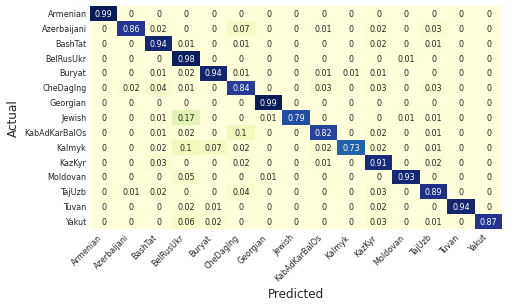

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9992	0.9905	0.9942	0.9924
Azerbaijani    	0.9904	0.9065	0.8645	0.8850
BashTat        	0.9812	0.9193	0.9403	0.9297
BelRusUkr      	0.9833	0.9388	0.9817	0.9598
Buryat         	0.9957	0.9564	0.9380	0.9471
CheDagIng      	0.9687	0.7969	0.8364	0.8162
Georgian       	0.9990	0.9884	0.9939	0.9912
Jewish         	0.9934	0.9423	0.7877	0.8581
KabAdKarBalOs  	0.9872	0.8738	0.8217	0.8469
Kalmyk         	0.9970	0.9524	0.7330	0.8284
KazKyr         	0.9778	0.9030	0.9150	0.9089
Moldovan       	0.9945	0.9592	0.9316	0.9452
TajUzb         	0.9783	0.9188	0.8906	0.9045
Tuvan          	0.9984	0.9745	0.9386	0.9562
Yakut          	0.9987	0.9837	0.8725	0.9247


{'accuracy': 0.9214639228965876,
 'precision macro': 0.9336302071168391,
 'recall macro': 0.89597974099307,
 'f1 macro': 0.9129517121205102}

In [19]:
test_model(clf_agr, le_a, X_test_a, y_test_a, 'cm_agr.tif')

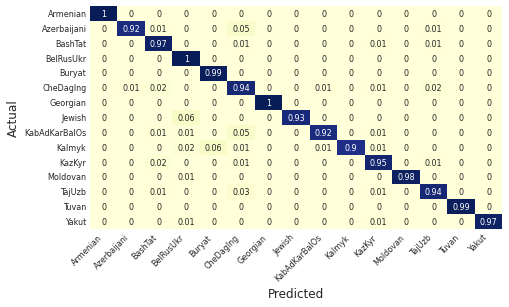

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9998	0.9972	0.9988	0.9980
Azerbaijani    	0.9946	0.9616	0.9214	0.9411
BashTat        	0.9903	0.9608	0.9681	0.9644
BelRusUkr      	0.9953	0.9805	0.9954	0.9879
Buryat         	0.9987	0.9833	0.9891	0.9862
CheDagIng      	0.9824	0.8874	0.9371	0.9116
Georgian       	0.9999	0.9992	0.9994	0.9993
Jewish         	0.9982	0.9856	0.9337	0.9590
KabAdKarBalOs  	0.9952	0.9622	0.9243	0.9429
Kalmyk         	0.9989	0.9919	0.9024	0.9451
KazKyr         	0.9908	0.9621	0.9539	0.9580
Moldovan       	0.9991	0.9957	0.9845	0.9900
TajUzb         	0.9881	0.9558	0.9367	0.9462
Tuvan          	0.9998	0.9979	0.9940	0.9959
Yakut          	0.9997	0.9984	0.9730	0.9855


{'accuracy': 0.9654865934722533,
 'precision macro': 0.9746353213107758,
 'recall macro': 0.9607854651861889,
 'f1 macro': 0.9673973660970597}

In [20]:
test_model(clf_agr, le_a, X_train_a, y_train_a)

In [21]:
y_pred_a = clf_agr.predict(X_test_a)
y_prob_a = clf_agr.predict_proba(X_test_a)

In [22]:
show_insecure_correct_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.35)

Name: камил аликханов; true: CheDagIng; pred: CheDagIng; top 3: CheDagIng 0.3416, TajUzb 0.3091, KazKyr 0.2250
Name: ислам бабатов; true: CheDagIng; pred: CheDagIng; top 3: CheDagIng 0.3442, KazKyr 0.2504, Azerbaijani 0.2039
Name: минара ибраева; true: KazKyr; pred: KazKyr; top 3: KazKyr 0.3398, CheDagIng 0.2612, BashTat 0.2602
Name: каусар сахи; true: KazKyr; pred: KazKyr; top 3: KazKyr 0.2672, Georgian 0.2134, Moldovan 0.1972
Name: оксана лангбурд; true: Jewish; pred: Jewish; top 3: Jewish 0.3473, BelRusUkr 0.2151, Kalmyk 0.1331
Name: марат ыакубов; true: TajUzb; pred: TajUzb; top 3: TajUzb 0.3234, CheDagIng 0.2426, KazKyr 0.2258
Name: азамат талипов; true: BashTat; pred: BashTat; top 3: BashTat 0.3423, TajUzb 0.3223, KazKyr 0.2908
Name: асия чалабаева; true: KazKyr; pred: KazKyr; top 3: KazKyr 0.3287, KabAdKarBalOs 0.3138, CheDagIng 0.2600
Name: сабина ибадиллаева; true: KazKyr; pred: KazKyr; top 3: KazKyr 0.3428, CheDagIng 0.2565, TajUzb 0.2322
Name: закират кадиева; true: CheDagIn

In [23]:
show_secure_incorrect_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.6)

Name: дархан хамниган; true: Buryat; pred: KazKyr; top 3: KazKyr 0.6529, Armenian 0.2091, Buryat 0.1380
Name: сергей троян; true: Moldovan; pred: Armenian; top 3: Armenian 0.6766, BelRusUkr 0.2928, Moldovan 0.0307
Name: олег моураов; true: KabAdKarBalOs; pred: BelRusUkr; top 3: BelRusUkr 0.6146, KabAdKarBalOs 0.3854, Yakut 0.0000
Name: гюлай омарова; true: Azerbaijani; pred: CheDagIng; top 3: CheDagIng 0.6546, Azerbaijani 0.3454, Yakut 0.0000
Name: азар хайдаров; true: KazKyr; pred: TajUzb; top 3: TajUzb 0.6916, BashTat 0.1957, Buryat 0.1126
Name: залина хулагова; true: CheDagIng; pred: KabAdKarBalOs; top 3: KabAdKarBalOs 0.8169, CheDagIng 0.1627, BashTat 0.0203
Name: зелим гудиев; true: KabAdKarBalOs; pred: CheDagIng; top 3: CheDagIng 0.6011, KabAdKarBalOs 0.3989, Yakut 0.0000
Name: азамат салахов; true: CheDagIng; pred: BashTat; top 3: BashTat 0.6896, KabAdKarBalOs 0.2838, CheDagIng 0.0265
Name: марк тростанетский; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.8221, Jewish 0.1147

Name: кынат бай; true: Yakut; pred: KazKyr; top 3: KazKyr 0.8865, Yakut 0.0756, Tuvan 0.0379
Name: зарема хуламханова; true: KabAdKarBalOs; pred: CheDagIng; top 3: CheDagIng 0.7120, BashTat 0.1676, KabAdKarBalOs 0.1043
Name: бекзат кадиров; true: TajUzb; pred: KazKyr; top 3: KazKyr 0.7254, TajUzb 0.2746, Yakut 0.0000
Name: мунира исанова; true: TajUzb; pred: BashTat; top 3: BashTat 0.6720, TajUzb 0.3003, Buryat 0.0142
Name: зугра рамазанова; true: BashTat; pred: CheDagIng; top 3: CheDagIng 0.7561, BashTat 0.1940, KazKyr 0.0499
Name: юмабек ормонов; true: KazKyr; pred: TajUzb; top 3: TajUzb 0.6212, KazKyr 0.3788, Yakut 0.0000
Name: авазбек нуралиев; true: KazKyr; pred: TajUzb; top 3: TajUzb 0.6698, KazKyr 0.2596, CheDagIng 0.0706
Name: владимир браславский; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.8345, Jewish 0.1655, Yakut 0.0000
Name: сардор мусакханов; true: KazKyr; pred: TajUzb; top 3: TajUzb 0.7049, CheDagIng 0.2269, Yakut 0.0682
Name: райхан шерматов; true: BashTat; pred:

In [24]:
show_secure_incorrect_preds(X_test_a, y_test_a, y_pred_a, y_prob_a, le_a, 0.9)

Name: умуд хациыев; true: CheDagIng; pred: Azerbaijani; top 3: Azerbaijani 0.9441, TajUzb 0.0559, Yakut 0.0000
Name: илья цвик; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: фокхир ыусуфбеков; true: KazKyr; pred: TajUzb; top 3: TajUzb 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: ибрагим исаев; true: TajUzb; pred: CheDagIng; top 3: CheDagIng 1.0000, Yakut 0.0000, Tuvan 0.0000
Name: маша фурик; true: Jewish; pred: BelRusUkr; top 3: BelRusUkr 0.9018, TajUzb 0.0982, Yakut 0.0000
Name: ситдиков ильгиз; true: TajUzb; pred: BashTat; top 3: BashTat 0.9898, Jewish 0.0102, Yakut 0.0000
Name: георгий мовилян; true: Moldovan; pred: Armenian; top 3: Armenian 0.9947, Kalmyk 0.0053, Yakut 0.0000
Name: алина давыдова; true: BashTat; pred: BelRusUkr; top 3: BelRusUkr 0.9816, BashTat 0.0184, Yakut 0.0000
Name: беслан тайсумов; true: KabAdKarBalOs; pred: CheDagIng; top 3: CheDagIng 0.9242, KabAdKarBalOs 0.0758, Yakut 0.0000
Name: жанболат жусалин; true: BashTat; pre

In [25]:
le_a, X_train_a, X_test_a, y_train_a, y_test_a = split_data(df_translit_ru_agr, test_size=0.0)
clf_agr = Pipeline(steps=[
    ('vect', TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_df=0.45, min_df=1, lowercase=False)),
    ('estimator', SGDClassifier(alpha=1e-05, class_weight=None, early_stopping=False, loss='modified_huber', 
                                penalty='elasticnet', random_state=0))])
clf_agr.fit(X_train_a, y_train_a)

Pipeline(steps=[('vect',
                 TfidfVectorizer(analyzer='char', lowercase=False, max_df=0.45,
                                 ngram_range=(1, 5))),
                ('estimator',
                 SGDClassifier(alpha=1e-05, loss='modified_huber',
                               penalty='elasticnet', random_state=0))])

# Save models

In [26]:
save_pkl('models/all_classes_model.pkl', clf)

In [27]:
save_pkl('models/aggregated_classes_model.pkl', clf_agr)

In [28]:
save_pkl('models/label_encoder.pkl', le)

In [29]:
save_pkl('models/aggregated_label_encoder.pkl', le_a)